In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.express as px
import seaborn as sns
import pandas as pd
import researchpy as rp
import plotly.io as pio
pio.renderers.default = "notebook"
import scipy.stats as st
from statsmodels.formula.api import ols
from collections import *
import ast
from datetime import date, timedelta, datetime
import tkinter
import matplotlib
%matplotlib inline
pio.renderers.default = "iframe"

In [2]:
df=pd.read_csv("/Users/Vera/Downloads/archive/diabetes_binary_health_indicators_BRFSS2015.csv")
df.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = df.drop("Diabetes_binary", axis=1)
# Normalization
X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)
#X = pd.get_dummies(data=X, columns=["GenHlth" , "Age", "Education", "Income"])
y = df.Diabetes_binary

In [5]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.00,0.6,0.500000,1.0,0.0,0.666667,0.6,0.285714
1,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.50,0.0,0.000000,0.0,0.0,0.500000,1.0,0.000000
2,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.00,1.0,1.000000,1.0,0.0,0.666667,0.6,1.000000
3,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.833333,0.4,0.714286
4,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.1,0.000000,0.0,0.0,0.833333,0.8,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,0.383721,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.50,0.0,0.166667,0.0,1.0,0.333333,1.0,0.857143
253676,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.75,0.0,0.000000,1.0,0.0,0.833333,0.2,0.428571
253677,0.0,0.0,1.0,0.186047,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.083333,0.8,0.142857
253678,1.0,0.0,1.0,0.127907,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.50,0.0,0.000000,0.0,1.0,0.500000,0.8,0.000000


In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [71]:
N = y_train.count()
print(N)
y_train.value_counts()

169965


0.0    146283
1.0     23682
Name: Diabetes_binary, dtype: int64

In [72]:
n = y_test.count()
print(n)
y_test.value_counts()

83715


0.0    72051
1.0    11664
Name: Diabetes_binary, dtype: int64

# PCA

In [73]:
from sklearn.decomposition import PCA

We see that scatter coeffcient that shows how correlated our data matrix is low, which indicates correlation. So we conclude that we can expect good results from PCA.

In [74]:
cormat = X.corr()
round(cormat,2)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HighBP,1.00,0.30,0.10,0.21,0.10,0.13,0.21,-0.13,-0.04,-0.06,...,0.04,0.02,0.30,0.06,0.16,0.22,0.05,0.34,-0.14,-0.17
HighChol,0.30,1.00,0.09,0.11,0.09,0.09,0.18,-0.08,-0.04,-0.04,...,0.04,0.01,0.21,0.06,0.12,0.14,0.03,0.27,-0.07,-0.09
CholCheck,0.10,0.09,1.00,0.03,-0.01,0.02,0.04,0.00,0.02,0.01,...,0.12,-0.06,0.05,-0.01,0.03,0.04,-0.02,0.09,0.00,0.01
BMI,0.21,0.11,0.03,1.00,0.01,0.02,0.05,-0.15,-0.09,-0.06,...,-0.02,0.06,0.24,0.09,0.12,0.20,0.04,-0.04,-0.10,-0.10
Smoker,0.10,0.09,-0.01,0.01,1.00,0.06,0.11,-0.09,-0.08,-0.03,...,-0.02,0.05,0.16,0.09,0.12,0.12,0.09,0.12,-0.16,-0.12
Stroke,0.13,0.09,0.02,0.02,0.06,1.00,0.20,-0.07,-0.01,-0.04,...,0.01,0.03,0.18,0.07,0.15,0.18,0.00,0.13,-0.08,-0.13
HeartDiseaseorAttack,0.21,0.18,0.04,0.05,0.11,0.20,1.00,-0.09,-0.02,-0.04,...,0.02,0.03,0.26,0.06,0.18,0.21,0.09,0.22,-0.10,-0.14
PhysActivity,-0.13,-0.08,0.00,-0.15,-0.09,-0.07,-0.09,1.00,0.14,0.15,...,0.04,-0.06,-0.27,-0.13,-0.22,-0.25,0.03,-0.09,0.20,0.20
Fruits,-0.04,-0.04,0.02,-0.09,-0.08,-0.01,-0.02,0.14,1.00,0.25,...,0.03,-0.04,-0.10,-0.07,-0.04,-0.05,-0.09,0.06,0.11,0.08
Veggies,-0.06,-0.04,0.01,-0.06,-0.03,-0.04,-0.04,0.15,0.25,1.00,...,0.03,-0.03,-0.12,-0.06,-0.06,-0.08,-0.06,-0.01,0.15,0.15


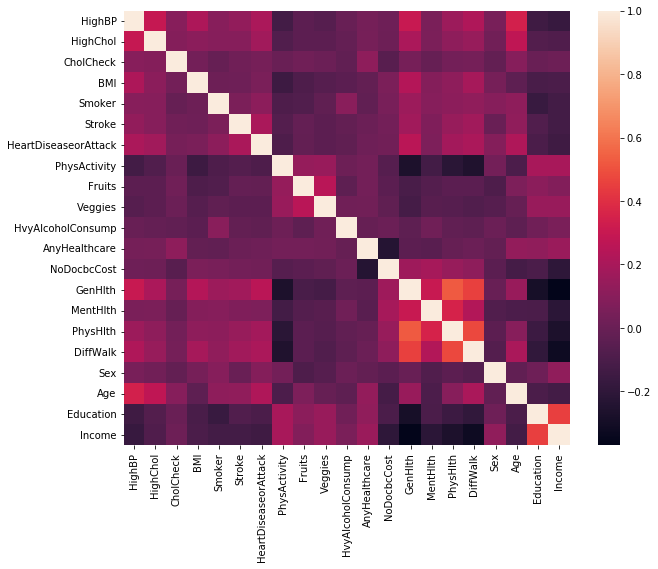

In [11]:
fig = plt.figure(figsize=[10,8])
sns.heatmap(cormat)
plt.show()

In [12]:
pca_full = PCA()
pca_full.fit(X)
pca_full

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

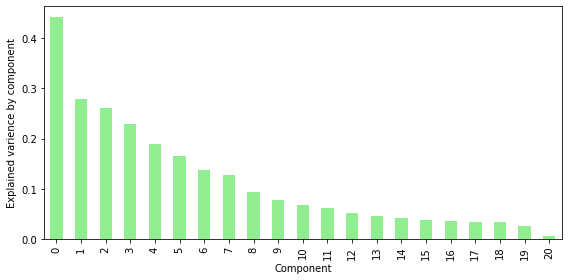

In [34]:
explained_variance = pd.DataFrame(pca_full.explained_variance_)
#showing the first value
ax = explained_variance.plot.bar(legend=False, figsize=(8, 4), color="lightgreen")
ax.set_xlabel('Component')
ax.set_ylabel('Explained varience by component')
plt.tight_layout()
plt.show()

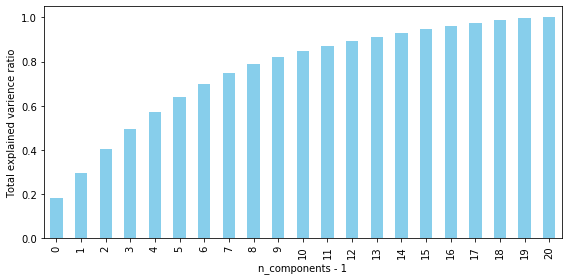

In [94]:
explained_variance_ratio = pd.DataFrame(np.cumsum(pca_full.explained_variance_ratio_))
ax = explained_variance_ratio.plot.bar(legend=False, figsize=(8, 4), color="skyblue")
ax.set_xlabel('n_components - 1')
ax.set_ylabel('Total explained varience ratio')
plt.tight_layout()
plt.show()

In [15]:
X_2 = PCA(n_components=2).fit_transform(X)

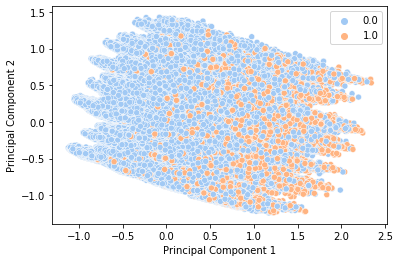

In [16]:
# plot the first two principal components with labels
colors = ["r", "g"]
labels = ["Class 1", "Class 2"]
sns.scatterplot(x=X_2[:,0], y=X_2[:,1], hue=y, palette="pastel")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [17]:
pca2 = PCA(n_components=2).fit(X[["Smoker", "Stroke"]])
pca2.components_

array([[ 0.99958492,  0.02880948],
       [-0.02880948,  0.99958492]])

In [18]:
Xplot = X[["Smoker", "Stroke", "Income"]].groupby(["Smoker", "Stroke"]).count().reset_index().rename(columns={"Income":"count"})

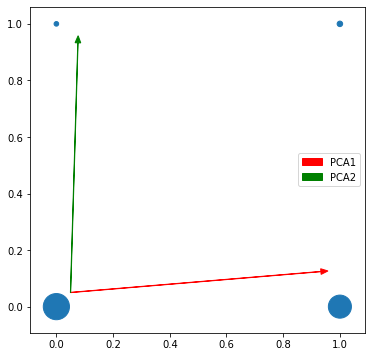

In [19]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(Xplot["Smoker"], Xplot["Stroke"], s = Xplot["count"]/200)
v1=ax.arrow(0.05,0.05, 0.05+0.99958492/1.2, 0.05+0.02880948/1.2, head_width=0.02, head_length=0.025, color="red", label="PCA1")
v2=ax.arrow(0.05,0.05, 0.05-0.02880948/1.2, 0.05+0.99958492/1.2, head_width=0.02, head_length=0.025, color="green", label="PCA2")
ax.legend(handles=[v1, v2])
plt.show()

In [40]:
pca = PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.fit(X)
pca.n_components_

14

In [23]:
pca = PCA(copy=True, iterated_power='auto', n_components=0.85, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.fit(X)
pca.n_components_

12

In [24]:
pca = PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.fit(X)
pca.n_components_

10

# SVD

In [21]:
svd_full = TruncatedSVD(n_components=20)
svd_full.fit(X)
svd_full

TruncatedSVD(algorithm='randomized', n_components=20, n_iter=5,
             random_state=None, tol=0.0)

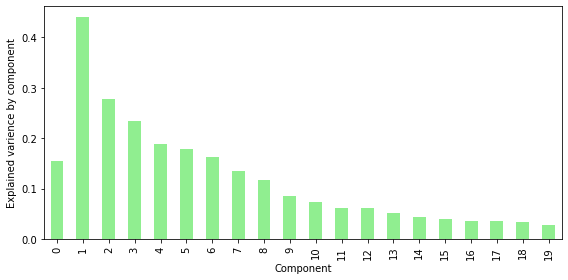

In [31]:
explained_variance = pd.DataFrame(svd_full.explained_variance_)
#showing the first value
ax = explained_variance.plot.bar(legend=False, figsize=(8, 4), color="lightgreen")
ax.set_xlabel('Component')
ax.set_ylabel('Explained varience by component')
plt.tight_layout()
plt.show()

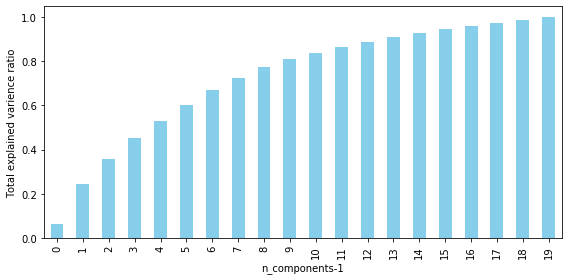

In [95]:
explained_variance_ratio = pd.DataFrame(np.cumsum(svd_full.explained_variance_ratio_))
ax = explained_variance_ratio.plot.bar(legend=False, figsize=(8, 4), color="skyblue")
ax.set_xlabel('n_components-1')
ax.set_ylabel('Total explained varience ratio')
plt.tight_layout()
plt.show()

In [171]:
svd = TruncatedSVD(n_components=14)
svd.fit(X)
sum(svd.explained_variance_ratio_)

0.9094724236205287

In [27]:
svd = TruncatedSVD(n_components=12)
svd.fit(X)
sum(svd.explained_variance_ratio_)

0.8636097714019461

In [28]:
svd = TruncatedSVD(n_components=10)
svd.fit(X)
sum(svd.explained_variance_ratio_)

0.808249588720857

# SVD and logistic regression

In [102]:
# Let us compare with the full model on the test set

full_model = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train, y_train)
ypredict_train = full_model.predict(X_train)
ypredict = full_model.predict(X_test)

print("Training data")
print(classification_report(y_train, ypredict_train))

print("\n")

print("Testing data")
print(classification_report(y_test, ypredict))

Training data
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93    146283
         1.0       0.54      0.16      0.24     23682

    accuracy                           0.86    169965
   macro avg       0.71      0.57      0.58    169965
weighted avg       0.83      0.86      0.83    169965



Testing data
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92     72051
         1.0       0.53      0.16      0.24     11664

    accuracy                           0.86     83715
   macro avg       0.70      0.57      0.58     83715
weighted avg       0.83      0.86      0.83     83715



In [103]:
# Let us compare with the full model on the test set

steps = [('svd', TruncatedSVD(n_components=14)), ('m', LogisticRegression(solver='lbfgs', max_iter=1000))]
model_svd = Pipeline(steps=steps).fit(X_train, y_train)
ypredict_train = model_svd.predict(X_train)
ypredict = model_svd.predict(X_test)

print("Training data")
print(classification_report(y_train, ypredict_train))

print("\n")

print("Testing data")
print(classification_report(y_test, ypredict))

Training data
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92    146283
         1.0       0.49      0.11      0.18     23682

    accuracy                           0.86    169965
   macro avg       0.68      0.55      0.55    169965
weighted avg       0.82      0.86      0.82    169965



Testing data
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     72051
         1.0       0.49      0.11      0.18     11664

    accuracy                           0.86     83715
   macro avg       0.68      0.54      0.55     83715
weighted avg       0.82      0.86      0.82     83715



In [104]:
# Let us compare with the full model on the test set

steps = [('svd', TruncatedSVD(n_components=12)), ('m', LogisticRegression(solver='lbfgs', max_iter=1000))]
model_svd = Pipeline(steps=steps).fit(X_train, y_train)
ypredict_train = model_svd.predict(X_train)
ypredict = model_svd.predict(X_test)

print("Training data")
print(classification_report(y_train, ypredict_train))

print("\n")

print("Testing data")
print(classification_report(y_test, ypredict))

Training data
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92    146283
         1.0       0.50      0.11      0.18     23682

    accuracy                           0.86    169965
   macro avg       0.68      0.54      0.55    169965
weighted avg       0.82      0.86      0.82    169965



Testing data
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     72051
         1.0       0.48      0.10      0.17     11664

    accuracy                           0.86     83715
   macro avg       0.68      0.54      0.55     83715
weighted avg       0.82      0.86      0.82     83715



In [105]:
# Let us compare with the full model on the test set

steps = [('svd', TruncatedSVD(n_components=10)), ('m', LogisticRegression(solver='lbfgs', max_iter=1000))]
model_svd = Pipeline(steps=steps).fit(X_train, y_train)
ypredict_train = model_svd.predict(X_train)
ypredict = model_svd.predict(X_test)

print("Training data")
print(classification_report(y_train, ypredict_train))

print("\n")

print("Testing data")
print(classification_report(y_test, ypredict))

Training data
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92    146283
         1.0       0.50      0.11      0.18     23682

    accuracy                           0.86    169965
   macro avg       0.68      0.55      0.55    169965
weighted avg       0.82      0.86      0.82    169965



Testing data
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     72051
         1.0       0.48      0.11      0.17     11664

    accuracy                           0.86     83715
   macro avg       0.68      0.54      0.55     83715
weighted avg       0.82      0.86      0.82     83715



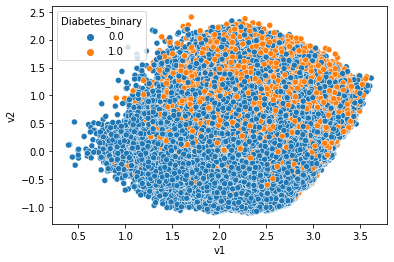

In [79]:
X2 = TruncatedSVD(n_components=2).fit_transform(X)
X2 = pd.DataFrame(X2, columns=["v1", "v2"])
X2
sns.scatterplot(data=X2, x="v1", y="v2", hue=y)
plt.show()

# PCA and logistic regression

In [107]:
# Let us compare with the full model on the test set

steps = [('PCA', PCA(n_components=14)), ('m', LogisticRegression(solver='lbfgs', max_iter=1000))]
model_svd = Pipeline(steps=steps).fit(X_train, y_train)
ypredict_train = model_svd.predict(X_train)
ypredict = model_svd.predict(X_test)

print("Training data")
print(classification_report(y_train, ypredict_train))

print("\n")

print("Testing data")
print(classification_report(y_test, ypredict))

Training data
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92    146283
         1.0       0.48      0.11      0.17     23682

    accuracy                           0.86    169965
   macro avg       0.68      0.54      0.55    169965
weighted avg       0.82      0.86      0.82    169965



Testing data
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     72051
         1.0       0.49      0.11      0.17     11664

    accuracy                           0.86     83715
   macro avg       0.68      0.54      0.55     83715
weighted avg       0.82      0.86      0.82     83715



In [108]:
# Let us compare with the full model on the test set

steps = [('PCA', PCA(n_components=12)), ('m', LogisticRegression(solver='lbfgs', max_iter=1000))]
model_svd = Pipeline(steps=steps).fit(X_train, y_train)
ypredict_train = model_svd.predict(X_train)
ypredict = model_svd.predict(X_test)

print("Training data")
print(classification_report(y_train, ypredict_train))

print("\n")

print("Testing data")
print(classification_report(y_test, ypredict))

Training data
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92    146283
         1.0       0.49      0.11      0.17     23682

    accuracy                           0.86    169965
   macro avg       0.68      0.54      0.55    169965
weighted avg       0.82      0.86      0.82    169965



Testing data
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     72051
         1.0       0.48      0.10      0.17     11664

    accuracy                           0.86     83715
   macro avg       0.68      0.54      0.55     83715
weighted avg       0.82      0.86      0.82     83715



In [109]:
# Let us compare with the full model on the test set

steps = [('PCA', PCA(n_components=10)), ('m', LogisticRegression(solver='lbfgs', max_iter=1000))]
model_svd = Pipeline(steps=steps).fit(X_train, y_train)
ypredict_train = model_svd.predict(X_train)
ypredict = model_svd.predict(X_test)

print("Training data")
print(classification_report(y_train, ypredict_train))

print("\n")

print("Testing data")
print(classification_report(y_test, ypredict))

Training data
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92    146283
         1.0       0.50      0.11      0.17     23682

    accuracy                           0.86    169965
   macro avg       0.68      0.54      0.55    169965
weighted avg       0.82      0.86      0.82    169965



Testing data
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     72051
         1.0       0.48      0.10      0.17     11664

    accuracy                           0.86     83715
   macro avg       0.68      0.54      0.55     83715
weighted avg       0.82      0.86      0.82     83715



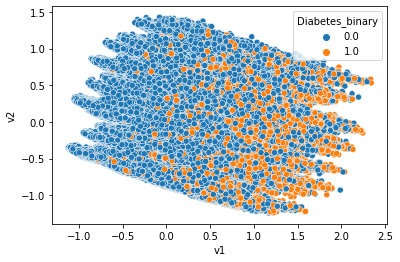

In [83]:
X2 = PCA(n_components=2).fit_transform(X)
X2 = pd.DataFrame(X2, columns=["v1", "v2"])
X2
sns.scatterplot(data=X2, x="v1", y="v2", hue=y)
plt.show()

# SVD and Linear SVM

In [84]:
from sklearn.svm import LinearSVC

In [113]:
# Let us compare with the full model on the test set

full_model = LinearSVC(max_iter=2000).fit(X_train, y_train)
ypredict_train = full_model.predict(X_train)
ypredict = full_model.predict(X_test)

print("Training data")
print(classification_report(y_train, ypredict_train))

print("\n")

print("Testing data")
print(classification_report(y_test, ypredict))

Training data
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93    146283
         1.0       0.59      0.07      0.13     23682

    accuracy                           0.86    169965
   macro avg       0.73      0.53      0.53    169965
weighted avg       0.83      0.86      0.81    169965



Testing data
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     72051
         1.0       0.57      0.07      0.13     11664

    accuracy                           0.86     83715
   macro avg       0.72      0.53      0.53     83715
weighted avg       0.83      0.86      0.81     83715



In [114]:
steps = [('svd', TruncatedSVD(n_components=14)), ('m', LinearSVC(max_iter=2000))]
model_svd = Pipeline(steps=steps).fit(X_train, y_train)
ypredict_train = model_svd.predict(X_train)
ypredict = model_svd.predict(X_test)

print("Training data")
print(classification_report(y_train, ypredict_train))

print("\n")

print("Testing data")
print(classification_report(y_test, ypredict))

Training data
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93    146283
         1.0       0.54      0.03      0.06     23682

    accuracy                           0.86    169965
   macro avg       0.70      0.51      0.49    169965
weighted avg       0.82      0.86      0.81    169965



Testing data
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93     72051
         1.0       0.54      0.03      0.06     11664

    accuracy                           0.86     83715
   macro avg       0.70      0.51      0.49     83715
weighted avg       0.82      0.86      0.80     83715



In [115]:
steps = [('svd', TruncatedSVD(n_components=12)), ('m', LinearSVC(max_iter=2000))]
model_svd = Pipeline(steps=steps).fit(X_train, y_train)
ypredict_train = model_svd.predict(X_train)
ypredict = model_svd.predict(X_test)

print("Training data")
print(classification_report(y_train, ypredict_train))

print("\n")

print("Testing data")
print(classification_report(y_test, ypredict))

Training data
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.93    146283
         1.0       0.55      0.04      0.07     23682

    accuracy                           0.86    169965
   macro avg       0.71      0.52      0.50    169965
weighted avg       0.82      0.86      0.81    169965



Testing data
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.93     72051
         1.0       0.56      0.04      0.07     11664

    accuracy                           0.86     83715
   macro avg       0.71      0.52      0.50     83715
weighted avg       0.82      0.86      0.81     83715



In [116]:
steps = [('svd', TruncatedSVD(n_components=10)), ('m', LinearSVC(max_iter=2000))]
model_svd = Pipeline(steps=steps).fit(X_train, y_train)
ypredict_train = model_svd.predict(X_train)
ypredict = model_svd.predict(X_test)

print("Training data")
print(classification_report(y_train, ypredict_train))

print("\n")

print("Testing data")
print(classification_report(y_test, ypredict))

Training data
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93    146283
         1.0       0.56      0.03      0.05     23682

    accuracy                           0.86    169965
   macro avg       0.71      0.51      0.49    169965
weighted avg       0.82      0.86      0.80    169965



Testing data
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93     72051
         1.0       0.57      0.03      0.05     11664

    accuracy                           0.86     83715
   macro avg       0.72      0.51      0.49     83715
weighted avg       0.82      0.86      0.80     83715



# PCA and Linear SVM

In [110]:
steps = [('PCA', PCA(n_components=14)), ('m', LinearSVC(max_iter=2000))]
model_svd = Pipeline(steps=steps).fit(X_train, y_train)
ypredict_train = model_svd.predict(X_train)
ypredict = model_svd.predict(X_test)

print("Training data")
print(classification_report(y_train, ypredict_train))

print("\n")

print("Testing data")
print(classification_report(y_test, ypredict))

Training data
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93    146283
         1.0       0.54      0.03      0.07     23682

    accuracy                           0.86    169965
   macro avg       0.70      0.52      0.50    169965
weighted avg       0.82      0.86      0.81    169965



Testing data
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93     72051
         1.0       0.55      0.03      0.06     11664

    accuracy                           0.86     83715
   macro avg       0.71      0.51      0.49     83715
weighted avg       0.82      0.86      0.80     83715



In [111]:
steps = [('PCA', PCA(n_components=12)), ('m', LinearSVC(max_iter=2000))]
model_svd = Pipeline(steps=steps).fit(X_train, y_train)
ypredict_train = model_svd.predict(X_train)
ypredict = model_svd.predict(X_test)

print("Training data")
print(classification_report(y_train, ypredict_train))

print("\n")

print("Testing data")
print(classification_report(y_test, ypredict))

Training data
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93    146283
         1.0       0.56      0.04      0.07     23682

    accuracy                           0.86    169965
   macro avg       0.71      0.52      0.50    169965
weighted avg       0.82      0.86      0.81    169965



Testing data
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93     72051
         1.0       0.55      0.03      0.06     11664

    accuracy                           0.86     83715
   macro avg       0.71      0.51      0.49     83715
weighted avg       0.82      0.86      0.81     83715



In [112]:
steps = [('PCA', PCA(n_components=10)), ('m', LinearSVC(max_iter=2000))]
model_svd = Pipeline(steps=steps).fit(X_train, y_train)
ypredict_train = model_svd.predict(X_train)
ypredict = model_svd.predict(X_test)

print("Training data")
print(classification_report(y_train, ypredict_train))

print("\n")

print("Testing data")
print(classification_report(y_test, ypredict))

Training data
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.93    146283
         1.0       0.55      0.04      0.07     23682

    accuracy                           0.86    169965
   macro avg       0.71      0.52      0.50    169965
weighted avg       0.82      0.86      0.81    169965



Testing data
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93     72051
         1.0       0.55      0.04      0.07     11664

    accuracy                           0.86     83715
   macro avg       0.71      0.52      0.50     83715
weighted avg       0.82      0.86      0.81     83715

